In [45]:
import pandas as pd
from rdkit import Chem

def prepare_data():
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.01.25.csv', index_col=0)
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv', index_col=0)

    SMILES_to_fgroup = {}
    SMILES_to_identificator = {}
    SMILES_to_cycle_type = {}
    SMILES_to_pKa = {}
    for index, row in df_main.iterrows():
        SMILES = row['Smiles']
        if pd.isnull(SMILES):
            continue
        
        SMILES_to_fgroup[SMILES] = row['F group']
        SMILES_to_identificator[SMILES] = row['identificator']
        SMILES_to_cycle_type[SMILES] = row['Framework']
        SMILES_to_pKa[SMILES] = row['pKa']
    
    return SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa

def train_test_smiles_data(is_canon=True):
    train = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKa_basicity_data\gnn_cv_canon_smiles\train_basic.csv')
    test = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKa_basicity_data\gnn_cv_canon_smiles\test_basic.csv')

    train_SMILES = train['Smiles'].tolist()
    test_SMILES = test['Smiles'].tolist()

    if is_canon:
        for train_index in range(len(train_SMILES)):
            train_SMILES[train_index] = Chem.CanonSmiles(train_SMILES[train_index])
        for test_index in range(len(test_SMILES)):
            test_SMILES[test_index] = Chem.CanonSmiles(test_SMILES[test_index])
    
    return train_SMILES, test_SMILES

In [46]:
"""atom sum relevance in fluorine group without hydrogens, not scaled"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -0.013, 'C1NC2CC1C2': 0, 'C1CCNC1': 0, 'CC12CC(CN1)C2': 0, 'FC(F)(F)C12CCC(CC1)CN2': -0.024, 'C1CC2CC1CN2': 0, 'C1CC2CCC1CN2': 0, 'C1CCNCC1': 0, 'FC(F)(F)C12CCCC(CN1)C2': -0.02, 'C1CC2CNC(C1)C2': 0, 'FC1(F)CC2CNCC(C2)C1': -0.055, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.001, 'FC1(F)C2CCCC1CNC2': -0.052, 'C1CC2CNCC(C1)C2': 0, 'FC1(F)C2CNCC1COC2': -0.007, 'C1NCC2COCC1C2': 0, 'C1CC2CNCC1C2': 0, 'C1CNC1': 0, 'FC1(F)CNC1': 0.021, 'FC1CCNC1': -0.192, 'FC1(F)CCNC1': 0.012, 'F[C@@H]1CNC[C@@H]1F': -0.048, 'F[C@@H]1CNC[C@H]1F': -0.048, 'FC1CCCNC1': -0.179, 'FC1(F)CCCNC1': -0.02, 'F[C@@H]1CNC[C@H](F)C1': -0.005, 'F[C@@H]1CNC[C@@H](F)C1': -0.005, 'FC1CCNCC1': -0.195, 'F[C@@H]1CCNC[C@@H]1F': -0.023, 'F[C@@H]1CCNC[C@H]1F': -0.023, 'FC(F)C1CCCCN1': -0.048, 'FC(F)C1CCCN1': -0.041, 'FC(F)(F)C1CCN1': -0.012, 'FC(F)C1CCN1': -0.047, 'NCCF': -0.114, 'FC(F)(F)C1CCCNC1': -0.007, 'FC(F)C1CCCNC1': -0.03, 'FCC1CCCNC1': -0.096, 'FC(F)C1CCNC1': -0.033, 'FCC1CCNC1': -0.099, 'FC(F)(F)C1CNC1': -0.005, 'FC(F)C1CNC1': -0.028, 'FCC1CNC1': -0.105, 'NCCC(F)F': -0.007, 'NCCCF': -0.097, 'CCN': 0, 'FC(F)C1CCNCC1': -0.051, 'FCC1CCNCC1': -0.096, 'NCCCCF': -0.07, 'NCCCC(F)F': -0.008, 'NCCCC(F)(F)F': -0.01, 'CCCN': 0, 'CCC(F)(F)CN': 0.003, 'CC(F)(F)CCN': -0.028, 'FC(F)(F)C12CCC(CN1)C2': -0.017, 'FC(F)(F)C1CCCN1': -0.013, 'FC(F)(F)C1CCCCN1': -0.017, 'FC1(F)CCNCC1': -0.003, 'FC1(F)C2CCC1CNC2': -0.015, 'FC1CNC1': -0.111, 'FCC1CCCCN1': -0.095, 'FCC1CCCN1': -0.119, 'FCC1CCN1': -0.119, 'FC(F)(F)C1CCNCC1': -0.009, 'CCCCN': 0, 'CC12CCC(CC1)CN2': 0, 'CC12CCCC(CN1)C2': 0}

# cyclobutane = {1: {'H': [0.06]}, 2: {'H': [0.16]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.01]}, 2: {'H': [0.09]}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.02]}, 2: {'H': [0.06]}, 3: {'H': [0.05]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {'H': [0.12], 'CF3': [0.10]}, 2: {'H': [0.56]}, 3: {'H': [0.33]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""atom sum relevance in fluorine group without hydrogens, scaled"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -3.649, 'C1NC2CC1C2': 0, 'C1CCNC1': 0, 'CC12CC(CN1)C2': 0, 'FC(F)(F)C12CCC(CC1)CN2': -3.679, 'C1CC2CC1CN2': 0, 'C1CC2CCC1CN2': 0, 'C1CCNCC1': 0, 'FC(F)(F)C12CCCC(CN1)C2': -3.8, 'C1CC2CNC(C1)C2': 0, 'FC1(F)CC2CNCC(C2)C1': -1.041, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.185, 'FC1(F)C2CCCC1CNC2': -1.026, 'C1CC2CNCC(C1)C2': 0, 'FC1(F)C2CNCC1COC2': -0.822, 'C1NCC2COCC1C2': 0, 'C1CC2CNCC1C2': 0, 'C1CNC1': 0, 'FC1(F)CNC1': 0.866, 'FC1CCNC1': -0.691, 'FC1(F)CCNC1': 0.903, 'F[C@@H]1CNC[C@@H]1F': -0.468, 'F[C@@H]1CNC[C@H]1F': -0.468, 'FC1CCCNC1': -0.734, 'FC1(F)CCCNC1': -1.203, 'F[C@@H]1CNC[C@H](F)C1': 0.964, 'F[C@@H]1CNC[C@@H](F)C1': 0.964, 'FC1CCNCC1': -0.745, 'F[C@@H]1CCNC[C@@H]1F': -0.57, 'F[C@@H]1CCNC[C@H]1F': -0.57, 'FC(F)C1CCCCN1': -1.969, 'FC(F)C1CCCN1': -2.485, 'FC(F)(F)C1CCN1': -1.933, 'FC(F)C1CCN1': -1.646, 'NCCF': 0.845, 'FC(F)(F)C1CCCNC1': -2.685, 'FC(F)C1CCCNC1': -1.466, 'FCC1CCCNC1': 0.918, 'FC(F)C1CCNC1': -2.212, 'FCC1CCNC1': 0.954, 'FC(F)(F)C1CNC1': -2.22, 'FC(F)C1CNC1': -1.696, 'FCC1CNC1': 0.888, 'NCCC(F)F': 1.117, 'NCCCF': 0.829, 'CCN': 0, 'FC(F)C1CCNCC1': -1.529, 'FCC1CCNCC1': 0.763, 'NCCCCF': 0.815, 'NCCCC(F)F': 1.075, 'NCCCC(F)(F)F': -2.402, 'CCCN': 0, 'CCC(F)(F)CN': -0.098, 'CC(F)(F)CCN': -0.805, 'FC(F)(F)C12CCC(CN1)C2': -3.862, 'FC(F)(F)C1CCCN1': -0.634, 'FC(F)(F)C1CCCCN1': -1.067, 'FC1(F)CCNCC1': -0.175, 'FC1(F)C2CCC1CNC2': -1.06, 'FC1CNC1': -0.361, 'FCC1CCCCN1': 0.696, 'FCC1CCCN1': 0.702, 'FCC1CCN1': 0.73, 'FC(F)(F)C1CCNCC1': 1.158, 'CCCCN': 0, 'CC12CCC(CC1)CN2': 0, 'CC12CCCC(CN1)C2': 0}

# cyclobutane = {1: {'H': [0.06]}, 2: {'H': [0.16]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.01]}, 2: {'H': [0.09]}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.02]}, 2: {'H': [0.06]}, 3: {'H': [0.05]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {'H': [0.12], 'CF3': [0.10]}, 2: {'H': [0.56]}, 3: {'H': [0.33]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""atom and edge avg relevance in fluorine group without hydrogens, scaled"""
relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -0.59, 'FC(F)(F)C1CCCN1': 0.2, 'C1NC2CC1C2': 0.9999999216400595, 'C1CCNC1': 1.0, 'CC12CC(CN1)C2': 0.2675675210800277, 'FC(F)(F)C12CCC(CN1)C2': -0.56, 'FC(F)(F)C12CCC(CC1)CN2': -0.4, 'FC(F)(F)C1CCCCN1': 0.11, 'C1CC2CC1CN2': 1.0, 'CC12CCC(CC1)CN2': 0.709964940955139, 'C1CC2CCC1CN2': 1.0, 'C1CCNCC1': 0.8648941848778366, 'FC(F)(F)C12CCCC(CN1)C2': -0.62, 'C1CC2CNC(C1)C2': 1.0, 'CC12CCCC(CN1)C2': 0.6532582748848474, 'FC1(F)CC2CNCC(C2)C1': 0.26, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.19, 'FC1(F)C2CCCC1CNC2': 0.26, 'C1CC2CNCC(C1)C2': 0.8865916529169795, 'FC1(F)C2CNCC1COC2': 0.23, 'C1NCC2COCC1C2': -1.0, 'O=S1(=O)CC2CNCC(C2)C1': 0.2845825137138098, 'O=S1(=O)CC2CNCC(C1)C2(F)F': 0.73, 'FC1(F)C2CCC1CNC2': 0.06, 'C1CC2CNCC1C2': 0.9885835937187486, 'FC1(F)CCNCC1': -0.35, 'C1CNC1': 1.0, 'FC1CNC1': 0.7, 'FC1(F)CNC1': -0.23, 'FC1CCNC1': 0.48, 'FC1(F)CCNC1': -0.17, 'F[C@@H]1CNC[C@@H]1F': 0.51, 'F[C@@H]1CNC[C@H]1F': 0.51, 'FC1CCCNC1': 0.48, 'FC1(F)CCCNC1': -0.01, 'F[C@@H]1CNC[C@H](F)C1': 0.73, 'F[C@@H]1CNC[C@@H](F)C1': 0.73, 'FC1CCNCC1': 0.49, 'F[C@@H]1CCNC[C@@H]1F': 0.43, 'F[C@@H]1CCNC[C@H]1F': 0.43, 'FC(F)C1CCCCN1': 0.39, 'FCC1CCCCN1': 0.71, 'FC(F)C1CCCN1': 0.31, 'FCC1CCCN1': 0.71, 'FC(F)(F)C1CCN1': -0.03, 'FC(F)C1CCN1': 0.24, 'FCC1CCN1': 0.72, 'NCC(F)(F)F': -0.43, 'NCC(F)F': 0.47, 'NCCF': 0.82, 'CN': 1.0, 'FC(F)(F)C1CCCNC1': -0.49, 'FC(F)C1CCCNC1': 0.67, 'FCC1CCCNC1': 0.84, 'FC(F)(F)C1CCNC1': 0.09, 'FC(F)C1CCNC1': 0.37, 'FCC1CCNC1': 0.86, 'FC(F)(F)C1CNC1': -0.66, 'FC(F)C1CNC1': 0.84, 'FCC1CNC1': 0.83, 'NCCC(F)(F)F': -0.57, 'NCCC(F)F': 0.47, 'NCCCF': 0.81, 'CCN': 1.0, 'FC(F)(F)C1CCNCC1': 0.39, 'FC(F)C1CCNCC1': 0.54, 'FCC1CCNCC1': 0.78, 'NCCCCF': 0.81, 'NCCCC(F)F': 0.61, 'NCCCC(F)(F)F': -0.33, 'CCCN': 1.0, 'CCC(F)(F)CN': 0.17, 'CC(F)(F)CCN': 0.38, 'CCCCN': 0.9676484575613731}

cyclobutane = {1: {'H': [0.419]}, 2: {'H': [1]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {'H': [0.676]}, 2: {'H': [1]}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {'H': [0.734]}, 2: {'H': [1]}, 3: {'H': [0.865]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
methane = {1: {'H': [1]}, 2: {'H': [1]}, 3: {'H': [1]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa = prepare_data()
train_smiles, test_smiles = train_test_smiles_data()

In [47]:
from collections import deque

functional_group_to_smiles = {
    "CF3": "CC(F)(F)F", 
    "CH2F": "CCF", 
    "gem-CF2": "CF", 
    "CHF2": "CC(F)(F)",
    "CHF": "CF",
    "non-F": ""
}

def find_the_closest_nitrogen_atom(
        mol, atom_id: int, 
        atoms_not_to_visit: list = []):

    queue = deque([(atom_id, 0)])

    visited = set()
    
    while queue:
        current_atom, distance = queue.popleft()
        if mol.GetAtomWithIdx(current_atom).GetSymbol().lower() == 'n':
            break

        visited.add(current_atom)
        
        neighbors = []
        for atom in mol.GetAtomWithIdx(current_atom).GetNeighbors():
            if atom.GetSymbol().lower() == 'h':
                continue
            if atom.GetIdx() in atoms_not_to_visit:
                continue
            neighbors.append(atom.GetIdx())
        
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append((neighbor, distance + 1))
    
    return current_atom, distance

In [48]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_secondary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return False
    
    return True


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    # is_secondary_amine_mol = is_secondary_amine(mol)
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_nitrogen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    # if not is_secondary_amine_mol:
    #     smiles_to_distance_to_nitrogen[SMILES] = math.inf
    # print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen)

In [49]:
smiles_to_distance_to_nitrogen

{'FC(F)(F)C12CC(CN1)C2': 1,
 'FC(F)(F)C1CCCN1': 1,
 'C1NC2CC1C2': inf,
 'C1CCNC1': inf,
 'CC12CC(CN1)C2': inf,
 'FC(F)(F)C12CCC(CN1)C2': 1,
 'FC(F)(F)C12CCC(CC1)CN2': 1,
 'FC(F)(F)C1CCCCN1': 1,
 'C1CC2CC1CN2': inf,
 'CC12CCC(CC1)CN2': inf,
 'C1CC2CCC1CN2': inf,
 'C1CCNCC1': inf,
 'FC(F)(F)C12CCCC(CN1)C2': 1,
 'C1CC2CNC(C1)C2': inf,
 'CC12CCCC(CN1)C2': inf,
 'FC1(F)CC2CNCC(C2)C1': 4,
 'FC1(F)CC2CNCC(C1)C2(F)F': 3,
 'FC1(F)C2CCCC1CNC2': 3,
 'C1CC2CNCC(C1)C2': inf,
 'FC1(F)C2CNCC1COC2': 3,
 'C1NCC2COCC1C2': inf,
 'O=S1(=O)CC2CNCC(C2)C1': inf,
 'O=S1(=O)CC2CNCC(C1)C2(F)F': 3,
 'FC1(F)C2CCC1CNC2': 3,
 'C1CC2CNCC1C2': inf,
 'FC1(F)CCNCC1': 3,
 'C1CNC1': inf,
 'FC1CNC1': 2,
 'FC1(F)CNC1': 2,
 'FC1CCNC1': 2,
 'FC1(F)CCNC1': 2,
 'F[C@@H]1CNC[C@@H]1F': 2,
 'F[C@@H]1CNC[C@H]1F': 2,
 'FC1CCCNC1': 2,
 'FC1(F)CCCNC1': 2,
 'F[C@@H]1CNC[C@H](F)C1': 2,
 'F[C@@H]1CNC[C@@H](F)C1': 2,
 'FC1CCNCC1': 3,
 'F[C@@H]1CCNC[C@@H]1F': 2,
 'F[C@@H]1CCNC[C@H]1F': 2,
 'FC(F)C1CCCCN1': 1,
 'FCC1CCCCN1': 1,
 'FC(F)C1CC

cyclopentane CF3 FC(F)(F)C1CCCN1 6.06 0.2
cyclohexane CF3 FC(F)(F)C1CCCCN1 6.41 0.11
cyclohexane CHF2 FC(F)C1CCCCN1 7.99 0.39
cyclohexane CH2F FCC1CCCCN1 9.52 0.71
cyclopentane CHF2 FC(F)C1CCCN1 7.78 0.31
cyclopentane CH2F FCC1CCCN1 9.55 0.71
cyclobutane CF3 FC(F)(F)C1CCN1 5.84 -0.03
cyclobutane CHF2 FC(F)C1CCN1 7.83 0.24
cyclobutane CH2F FCC1CCN1 9.67 0.72
methane CF3 NCC(F)(F)F 5.56 -0.43
methane CHF2 NCC(F)F 7.2 0.47
methane CH2F NCCF 8.96 0.82
['H', 'CH2F', 'CHF2', 'CF3'] [0.419, 0.72, 0.24, -0.03] [11.21, 9.67, 7.83, 5.84]
['H', 'CH2F', 'CHF2', 'CF3'] [0.676, 0.71, 0.31, 0.2] [11.27, 9.55, 7.78, 6.06]
['H', 'CH2F', 'CHF2', 'CF3'] [0.734, 0.71, 0.39, 0.11] [11.12, 9.52, 7.99, 6.41]
['H', 'CH2F', 'CHF2', 'CF3'] [1.0, 0.82, 0.47, -0.43] [10.78, 8.96, 7.2, 5.56]


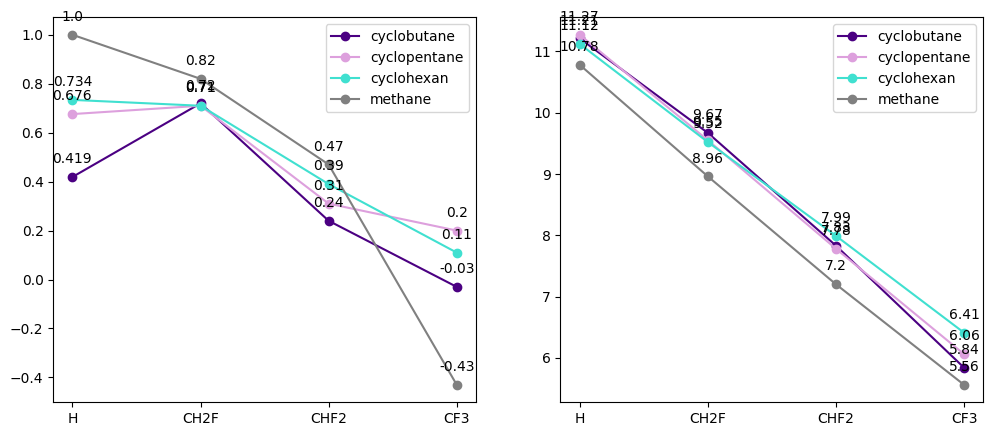

cyclobutane CHF FC1CNC1 8.55 0.7
cyclobutane gem-CF2 FC1(F)CNC1 6.44 -0.23
cyclopentane CHF FC1CCNC1 8.87 0.48
cyclopentane gem-CF2 FC1(F)CCNC1 6.88 -0.17
cyclopentane CHF F[C@@H]1CNC[C@@H]1F 7.07 0.51
cyclopentane CHF F[C@@H]1CNC[C@H]1F 7.11 0.51
cyclohexane CHF FC1CCCNC1 8.64 0.48
cyclohexane gem-CF2 FC1(F)CCCNC1 6.79 -0.01
cyclohexane CHF F[C@@H]1CNC[C@H](F)C1 6.74 0.73
cyclohexane CHF F[C@@H]1CNC[C@@H](F)C1 6.22 0.73
cyclohexane CHF F[C@@H]1CCNC[C@@H]1F 7.01 0.43
cyclohexane CHF F[C@@H]1CCNC[C@H]1F 7.02 0.43
cyclohexane CF3 FC(F)(F)C1CCCNC1 9.01 -0.49
cyclohexane CHF2 FC(F)C1CCCNC1 9.55 0.67
cyclohexane CH2F FCC1CCCNC1 10.32 0.84
cyclopentane CF3 FC(F)(F)C1CCNC1 8.97 0.09
cyclopentane CHF2 FC(F)C1CCNC1 9.75 0.37
cyclopentane CH2F FCC1CCNC1 10.38 0.86
cyclobutane CF3 FC(F)(F)C1CNC1 8.67 -0.66
cyclobutane CHF2 FC(F)C1CNC1 9.57 0.84
cyclobutane CH2F FCC1CNC1 10.05 0.83
methane CF3 NCCC(F)(F)F 8.88 -0.57
methane CHF2 NCCC(F)F 9.02 0.47
methane CH2F NCCCF 10.05 0.81
methane gem-CF2 CCC(

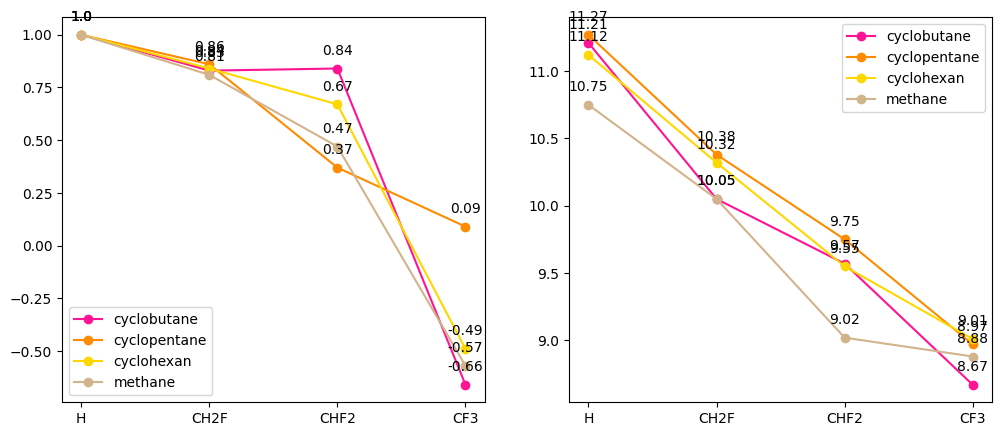

cyclohexane gem-CF2 FC1(F)CCNCC1 7.75 -0.35
cyclohexane CHF FC1CCNCC1 9.05 0.49
cyclohexane CF3 FC(F)(F)C1CCNCC1 9.6 0.39
cyclohexane CHF2 FC(F)C1CCNCC1 10.19 0.54
cyclohexane CH2F FCC1CCNCC1 10.46 0.78
methane CH2F NCCCCF 10.36 0.81
methane CHF2 NCCCC(F)F 10.02 0.61
methane CF3 NCCCC(F)(F)F 9.74 -0.33
methane gem-CF2 CC(F)(F)CCN 9.57 0.38
['H', 'CH2F', 'CHF2', 'CF3'] [0.865, 0.78, 0.54, 0.39] [11.12, 10.46, 10.19, 9.6]
['H', 'CH2F', 'CHF2', 'CF3'] [1.0, 0.81, 0.61, -0.33] [10.03, 10.36, 10.02, 9.74]


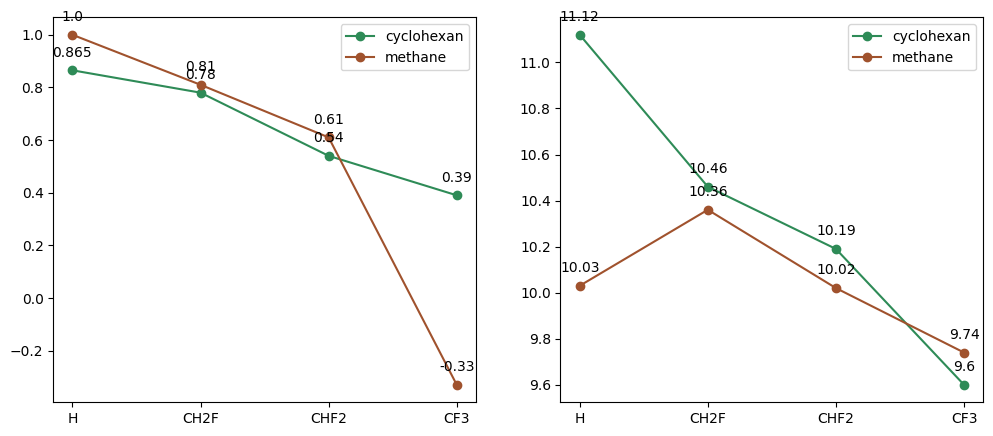

In [54]:
import matplotlib.pyplot as plt

cyclobutane_color = {1: 'indigo', 2: 'deeppink'}
cyclopentane_color = {1: 'plum', 2: 'darkorange'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna'}

cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
methane_name = 'methane'

cyclobutane_logP = {1: {'H': [11.21]}, 2: {'H': [11.21]}}
cyclopentane_logP = {1: {'H': [11.27]}, 2: {'H': [11.27], 'CF3': [8.97]}}
cyclohexan_logP = {1: {'H': [11.12]}, 2: {'H': [11.12]}, 3: {'H': [11.12]}}
methane_logP = {1: {'H': [10.78]}, 2: {'H': [10.75]}, 3: {'H': [10.03]}}

for distance_global in range(1, 4):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3', 'CHF', 'gem-CF2']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_pKa[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    for molecule_group, color, label, logP_dict in [(cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP),
                                                    (methane, methane_color, methane_name, methane_logP)]:
        X, y_relevance, y_logP = [], [], []
        if distance_global not in molecule_group:
            continue
        
        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue

            X.append(f_group_optimal)
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(X, y_relevance, y_logP)
        ax1.plot(X, y_relevance, marker='o', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X)):
            ax1.annotate(f"{str(y_relevance[i])}", (X[i], y_relevance[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.plot(X, y_logP, marker='o', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X)):
            ax2.annotate(f"{str(y_logP[i])}", (X[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()

    plt.show()
    
    
